In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import make_scorer, matthews_corrcoef, accuracy_score
from sklearn.model_selection import train_test_split, cross_validate, RepeatedKFold
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [5]:
iris = load_breast_cancer(as_frame=True)
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [13]:
random_state = 5253453
n_repeats = 10
n_splits = 10
mcc_scorer = make_scorer(matthews_corrcoef)
randomized_labels = y_train.sample(frac=1.0, random_state=random_state)
repeated_k_fold_cv = RepeatedKFold(random_state=random_state, n_repeats=n_repeats, n_splits=n_splits)
n_jobs = 6

#pipe = Pipeline([('standard_scaler', StandardScaler()), ('variance_threshold', VarianceThreshold(threshold=0.0)),
#                 ('model', RandomForestClassifier(random_state=random_state, n_jobs=n_jobs))])
pipe = Pipeline([('model', RandomForestClassifier(random_state=random_state, n_jobs=n_jobs))])
cv = pd.DataFrame(cross_validate(pipe, X=X_train, y=y_train, cv=repeated_k_fold_cv, scoring=mcc_scorer, n_jobs=n_jobs))
cv['model'] = 'true'
cv_rand = pd.DataFrame(
    cross_validate(pipe, X=X_train, y=randomized_labels, cv=repeated_k_fold_cv, scoring=mcc_scorer, n_jobs=n_jobs))
cv_rand['model'] = 'random'

cv_results = pd.concat([cv, cv_rand])

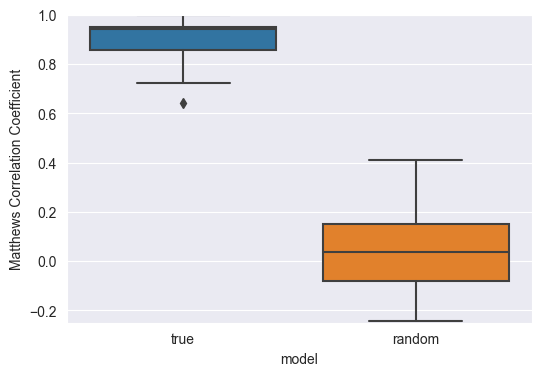

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=100)
sns.boxplot(data=cv_results, x='model', y='test_score', ax=ax)
ax.set_ylim(-0.25, 1.0)
ax.set_ylabel('Matthews Correlation Coefficient')
plt.show()

In [19]:
pipe = Pipeline([('model', RandomForestClassifier(n_jobs=n_jobs, n_estimators=100, max_depth=10, max_samples=1.0))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
mcc = round(matthews_corrcoef(y_test, y_pred), 3)
acc = round(accuracy_score(y_test, y_pred), 3)
print(f'MCC={mcc}; ACC={acc}')

MCC=0.937; ACC=0.971
